In [50]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## Question 1

In [16]:
iris = datasets.load_iris()
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [17]:
X = iris.data
y = iris.target
display(X.shape)
display(y.shape)

(150, 4)

(150,)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Question 2

In [18]:
from sklearn.dummy import DummyClassifier
zero_r = DummyClassifier(strategy = 'most_frequent')

In [21]:
zero_r.fit(X, y)
zero_r.score(X, y)

0.3333333333333333

In [25]:
# weighted random classifier constracts a probability distribution over the labels in the training data
# then classify by sampling from that probability distribution

weighted_clf = DummyClassifier(strategy='stratified')
weighted_clf.fit(X, y)

accuracies = [weighted_clf.score(X, y) for i in range(100)]
np.mean(accuracies)

0.33453333333333346

## Question 3

In [59]:
from sklearn.tree import DecisionTreeClassifier

# 1-R classifier is the same as Decison Tree with a single partition
one_r = DecisionTreeClassifier(max_depth=1)
one_r.fit(X, y)
display(one_r.score(X, y))

# Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X, y)
display(dt.score(X, y))

0.6666666666666666

0.9733333333333334

In [61]:
display(one_r.feature_importances_)
display(dt.feature_importances_)

array([0., 0., 0., 1.])

array([0.        , 0.        , 0.05393633, 0.94606367])

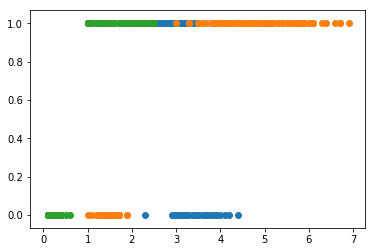

In [62]:
predictions = one_r.predict(X)
petal_width_cm = X[:, 2]

plt.scatter(X[:,1], predictions)
plt.scatter(petal_width_cm, predictions)
plt.scatter(X[:,3], predictions)
plt.show()

In [63]:
# Information gain vs Gini coefficient give the same results most of the time


In [64]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Question 4

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y)

zero_r.fit(X_train, y_train)
one_r.fit(X_train, y_train)
dt.fit(X_train, y_train)

for model in [zero_r, one_r, dt]:
    print(accuracy_score(model.predict(X_train), y_train), accuracy_score(model.predict(X_test), y_test))

0.3482142857142857 0.2894736842105263
0.6785714285714286 0.631578947368421
1.0 0.8947368421052632


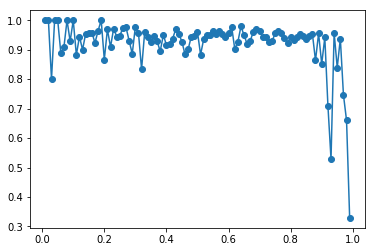

In [114]:
test_accuracies = []
for proportion in np.arange(0.01, 1, 0.01):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=proportion)
    dt.fit(X_train, y_train)
    test_accuracies.append(accuracy_score(dt.predict(X_test), y_test))
    
plt.plot(np.arange(0.01, 1, 0.01), test_accuracies, '-o')
plt.show()

## Question 5

In [120]:
from sklearn.model_selection import cross_val_score

for model in [zero_r, one_r, dt]:
    display(cross_val_score(model, X, y, cv=10))

array([0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333])

array([0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667])

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.93333333, 0.93333333, 1.        , 1.        ])